In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from scipy import optimize
from ipywidgets import * 
from IPython.display import SVG
from sklearn import datasets

In [18]:
AND = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,0,0,1)})
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [19]:
w = np.random.randn(3)*1e-4

In [20]:
w

array([ 9.78487689e-05, -7.47811325e-06, -2.01517248e-04])

In [21]:
g = lambda inputs, weights: np.where(np.dot(inputs, weights)>0, 1, 0)

In [23]:
inputs = AND[['x1','x2']]
inputs

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [24]:
-np.ones((len(inputs), 1))

array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [25]:
a = np.c_[inputs, -np.ones((len(inputs), 1))]
a

array([[ 0.,  0., -1.],
       [ 0.,  1., -1.],
       [ 1.,  0., -1.],
       [ 1.,  1., -1.]])

In [26]:
w

array([ 9.78487689e-05, -7.47811325e-06, -2.01517248e-04])

In [27]:
np.dot(a, w)

array([0.00020152, 0.00019404, 0.00029937, 0.00029189])

In [28]:
def train(inputs, targets, weights, eta, n_iterations):

    # Add the inputs that match the bias node 
    inputs = np.c_[inputs, -np.ones((len(inputs), 1))]

    for n in range(n_iterations):

        activations = g(inputs, weights);
        print(n, activations)
        weights -= eta*np.dot(np.transpose(inputs), activations - targets)
        print(n, weights)

    return (weights)

In [29]:
inputs = AND[['x1','x2']]
target = AND['y']

w = train(inputs, target, w, 0.3, 20)
target

0 [1 1 1 1]
0 [-0.29990215 -0.30000748  0.89979848]
1 [0 0 0 0]
1 [ 9.78487689e-05 -7.47811325e-06  5.99798483e-01]
2 [0 0 0 0]
2 [0.30009785 0.29999252 0.29979848]
3 [0 1 1 1]
3 [ 9.78487689e-05 -7.47811325e-06  8.99798483e-01]
4 [0 0 0 0]
4 [0.30009785 0.29999252 0.59979848]
5 [0 0 0 1]
5 [0.30009785 0.29999252 0.59979848]
6 [0 0 0 1]
6 [0.30009785 0.29999252 0.59979848]
7 [0 0 0 1]
7 [0.30009785 0.29999252 0.59979848]
8 [0 0 0 1]
8 [0.30009785 0.29999252 0.59979848]
9 [0 0 0 1]
9 [0.30009785 0.29999252 0.59979848]
10 [0 0 0 1]
10 [0.30009785 0.29999252 0.59979848]
11 [0 0 0 1]
11 [0.30009785 0.29999252 0.59979848]
12 [0 0 0 1]
12 [0.30009785 0.29999252 0.59979848]
13 [0 0 0 1]
13 [0.30009785 0.29999252 0.59979848]
14 [0 0 0 1]
14 [0.30009785 0.29999252 0.59979848]
15 [0 0 0 1]
15 [0.30009785 0.29999252 0.59979848]
16 [0 0 0 1]
16 [0.30009785 0.29999252 0.59979848]
17 [0 0 0 1]
17 [0.30009785 0.29999252 0.59979848]
18 [0 0 0 1]
18 [0.30009785 0.29999252 0.59979848]
19 [0 0 0 1]
19 [0

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [30]:
g(np.c_[inputs, -np.ones((len(inputs), 1))], w)

array([0, 0, 0, 1])

In [32]:
OR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,1)})
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [34]:
w = np.random.randn(3)*1e-4

In [35]:
imputs = OR[['x1','x2']]
target = OR['y']

w = train(inputs, target, w, 0.25, 20)

0 [0 0 0 0]
0 [ 0.49999026  0.49997691 -0.74981263]
1 [1 1 1 1]
1 [ 0.49999026  0.49997691 -0.49981263]
2 [1 1 1 1]
2 [ 0.49999026  0.49997691 -0.24981263]
3 [1 1 1 1]
3 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
4 [0 1 1 1]
4 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
5 [0 1 1 1]
5 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
6 [0 1 1 1]
6 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
7 [0 1 1 1]
7 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
8 [0 1 1 1]
8 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
9 [0 1 1 1]
9 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
10 [0 1 1 1]
10 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
11 [0 1 1 1]
11 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
12 [0 1 1 1]
12 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
13 [0 1 1 1]
13 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
14 [0 1 1 1]
14 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
15 [0 1 1 1]
15 [4.99990257e-01 4.99976910e-01 1.87372201e-04]
16 [0 1 1 1]
16 [4.99990257e-01 4.99976

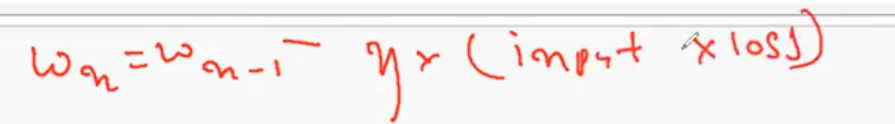

new weight = older weight - eeta * (input * loss)

eeta -> learning rate